<a href="https://colab.research.google.com/github/vedxnt10/IPL_Auction_Website/blob/main/Stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Import the libraries
import yfinance as yf
import pandas as pd
import os
import math
import numpy as np
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Getting data from yahoo finance

In [6]:
# df=pd.read_csv("TATACONSUM.NS.csv")
ticker='Tataconsum.ns'
start_date='2010-1-1'
end_date='2024-4-10'

inp_seq_size=200

df=yf.download(ticker,start=start_date,end=end_date)

print(df,"\n\n",df.shape)

[*********************100%***********************]  1 of 1 completed

Price                         Adj Close         Close          High  \
Ticker                    TATACONSUM.NS TATACONSUM.NS TATACONSUM.NS   
Date                                                                  
2010-01-04 00:00:00+00:00     77.440720     94.925003     95.500000   
2010-01-05 00:00:00+00:00     83.445076    102.285004    105.235001   
2010-01-06 00:00:00+00:00     84.750381    103.885002    104.839996   
2010-01-07 00:00:00+00:00     85.048149    104.250000    106.800003   
2010-01-08 00:00:00+00:00     85.472374    104.769997    107.474998   
...                                 ...           ...           ...   
2024-04-03 00:00:00+00:00   1111.834595   1119.500000   1129.000000   
2024-04-04 00:00:00+00:00   1110.295166   1117.949951   1132.900024   
2024-04-05 00:00:00+00:00   1107.911621   1115.550049   1124.900024   
2024-04-08 00:00:00+00:00   1129.562256   1137.349976   1140.449951   
2024-04-09 00:00:00+00:00   1117.892822   1125.599976   1141.000000   

Price

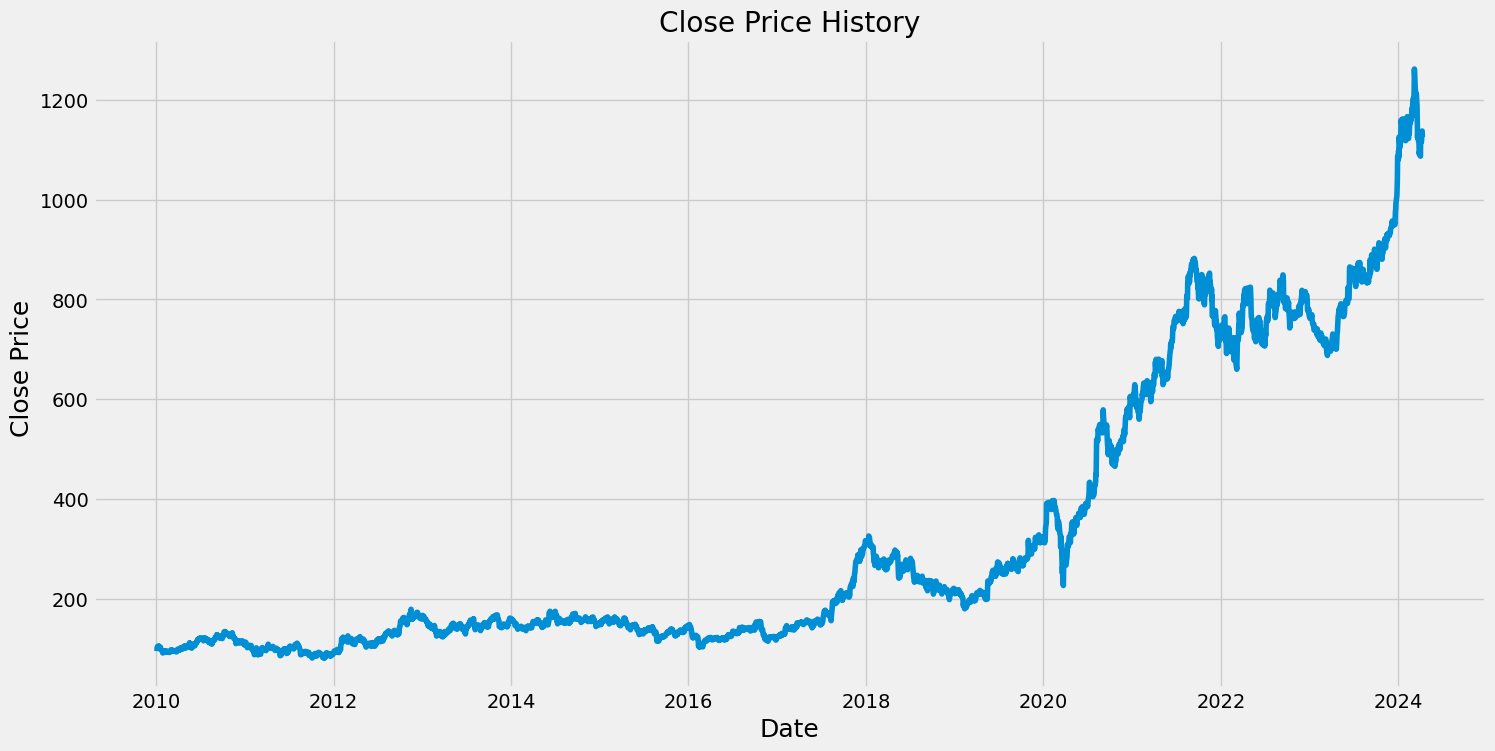

In [7]:
# visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.show()

In [22]:
#Create a new dataframe with only the 'Close column
data = df[['Close']]
#Convert the dataframe to a numpy array
dataset = data.values
print(dataset)

# dataset

# printing shape and last 5 in dataset
print(dataset.shape,"\n\n",dataset[-10:])


[[  94.92500305]
 [ 102.28500366]
 [ 103.88500214]
 ...
 [1115.55004883]
 [1137.34997559]
 [1125.59997559]]
(3521, 1) 

 [[1112.55004883]
 [1091.05004883]
 [1096.19995117]
 [1086.90002441]
 [1131.15002441]
 [1119.5       ]
 [1117.94995117]
 [1115.55004883]
 [1137.34997559]
 [1125.59997559]]


## Normalizing data

In [24]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data.shape," \n\n")
scaled_data[-10:]

# print("Dataset shape:", dataset.shape)
# print("Dataset preview:\n", dataset.head() if hasattr(dataset, "head") else dataset[:5])

(3521, 1)  




array([[0.87379299],
       [0.85558191],
       [0.85994402],
       [0.85206673],
       [0.88954767],
       [0.87967979],
       [0.87836685],
       [0.87633407],
       [0.8947992 ],
       [0.88484663]])

In [25]:

#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

2817

In [29]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]

# print(train_data.shape," \n\n",train_data[0:10])


#Split the data into x_train and y_train data sets
x_train = []
y_train = []


for i in range (inp_seq_size, len(train_data)-1):
    x_train.append(train_data[i-inp_seq_size:i, 0])
    y_train.append(train_data[i+1, 0])
    # in this x_train is list of lists. each has 60 (inp_seq_size) numbers. this numbers previous 60 close price ,
    # and y_train is list of number and each number is the 61th close price i.e. the next close price based on last 60 prices.
    # if i<= inp_seq_size+1:
    #     print(x_train)
    #     print (y_train)
    #     print()

# print("\n\n 60 Training values : ",train_data[0:60,0])

# print("\n\n Next day price based on 60 : ",train_data[60,0])

print(f"\n\n {inp_seq_size} Training values : ",x_train[0])

print(f"\n\n Next day price based on {inp_seq_size} : ",y_train[0])

print(len(x_train),len(y_train))



 200 Training values :  [0.01183721 0.01807132 0.01942657 0.01973573 0.02017618 0.02067593
 0.01863459 0.01977384 0.01946045 0.01940116 0.01876165 0.01737252
 0.01627563 0.01472133 0.01409029 0.01306539 0.01063866 0.00872861
 0.00894884 0.011041   0.00974505 0.01218025 0.01097324 0.01012621
 0.01102829 0.01135016 0.01053702 0.01228189 0.01193038 0.0115958
 0.0110537  0.01111723 0.0099441  0.01024056 0.01022361 0.01067678
 0.00960952 0.01084618 0.01226919 0.014175   0.01436981 0.0135609
 0.01279011 0.01136287 0.01249789 0.01305269 0.01275623 0.01284093
 0.01233695 0.01261647 0.01184144 0.01187955 0.01216331 0.010969
 0.011041   0.01067254 0.01333644 0.01516178 0.0143444  0.0136329
 0.01328985 0.01359055 0.01412418 0.01389124 0.01624598 0.01784262
 0.01742334 0.01665255 0.01478062 0.01546248 0.01573353 0.01701677
 0.01796121 0.01935033 0.02027359 0.01925716 0.01681349 0.01813485
 0.02062934 0.01988819 0.01762239 0.01883788 0.01869812 0.01829155
 0.01910046 0.01867695 0.018876   0.01946

In [30]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - inp_seq_size:, :]
#Create the data sets x_test and y_test

print(len(test_data))

x_test = []
y_test = []
# y_test=[]

for i in range (inp_seq_size, len(test_data)-1):
    x_test.append(test_data[i-inp_seq_size:i, 0])
    y_test.append(scaled_data[i+1, 0])


print(f"\n\n {inp_seq_size} testing values : ",x_test[0])

print(f"\n\n Next day price based on {inp_seq_size} : ",y_test[0])

904


 200 testing values :  [0.39200405 0.3936981  0.39577333 0.3966627  0.39374045 0.39352869
 0.39352869 0.39657802 0.3927664  0.39479923 0.38234792 0.39602743
 0.39717089 0.42143824 0.41343382 0.39331693 0.38743009 0.38438081
 0.39437572 0.39594275 0.39433338 0.39081819 0.39086059 0.39585801
 0.3893359  0.36151108 0.35867354 0.34948329 0.34533286 0.36324748
 0.36934608 0.35769946 0.35490428 0.36265457 0.35795356 0.35968998
 0.3592241  0.34499406 0.3305946  0.33351685 0.32864645 0.34630694
 0.33300863 0.33554971 0.33449093 0.33622732 0.32555478 0.32631713
 0.33190748 0.33542266 0.35388784 0.34889039 0.34817041 0.34889039
 0.34965271 0.34605284 0.34880568 0.36040996 0.35850415 0.36328984
 0.35359138 0.35786888 0.36235811 0.36616973 0.36862613 0.37044721
 0.3692614  0.36816022 0.37108248 0.37328478 0.37768928 0.36748261
 0.37176009 0.38713365 0.3797645  0.38819243 0.3976368  0.40873283
 0.41241738 0.40809756 0.41042689 0.42262409 0.4196595  0.4201677
 0.41533963 0.42575805 0.42042179 

In [31]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data. I
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# y_train = np.reshape(1,y_train)
x_train.shape
# y_train.shape

(2616, 200, 1)

In [32]:
#Convert the x_train and y_train to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)
#Reshape the data. I
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape
# y_test.shape

(703, 200, 1)

# Model making

In [33]:
#Build the LSTM model

model= Sequential()
model.add(LSTM (50, return_sequences=True, input_shape= (inp_seq_size, 1)))
model.add(LSTM (50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(32))
# model.add(Dense(1))


# from keras.layers import Dropout
# model = Sequential()
# model.add(LSTM(1024, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(512, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(128))
# model.add(Dense(32))
# model.add(Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 200, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
#Train the model
history=model.fit(x_train, y_train, batch_size=2, epochs=1)

1308/1308 ━━━━━━━━━━━━━━━━━━━━ 146s 109ms/step - loss: 5.7443e-04


In [36]:
#Get the models predicted price values
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)

predictions.shape

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


(703, 1)

In [37]:
x_test.shape

(703, 200, 1)

In [40]:

# print("For scalar: ",predictions[-10:],"\n\n",y_test[-10:])

real_predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
real_y_test = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

print("\n\nFor real: ",real_predictions[-10:],"\n\n",real_y_test[-10:])

# predictions[-10:]




For real:  [[1125.1575]
 [1115.2777]
 [1105.5723]
 [1095.0189]
 [1085.6307]
 [1076.9683]
 [1073.669 ]
 [1072.3796]
 [1072.1458]
 [1072.2701]] 

 [[145.5       ]
 [146.55000305]
 [147.6499939 ]
 [140.44999695]
 [141.6499939 ]
 [140.8999939 ]
 [141.8999939 ]
 [146.25      ]
 [146.75      ]
 [144.05000305]]


In [41]:
# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print(rmse)
# Calculate the accuracy of the model in percentage
accuracy_percentage = (1 - rmse / np.mean(y_test)) * 100

print(f"The accuracy of the model is: {accuracy_percentage:.2f}%")


0.5918875146817563
The accuracy of the model is: -1733.47%


In [42]:
training_data_len

2817

<ipython-input-44-44a0d5cad0c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = real_predictions


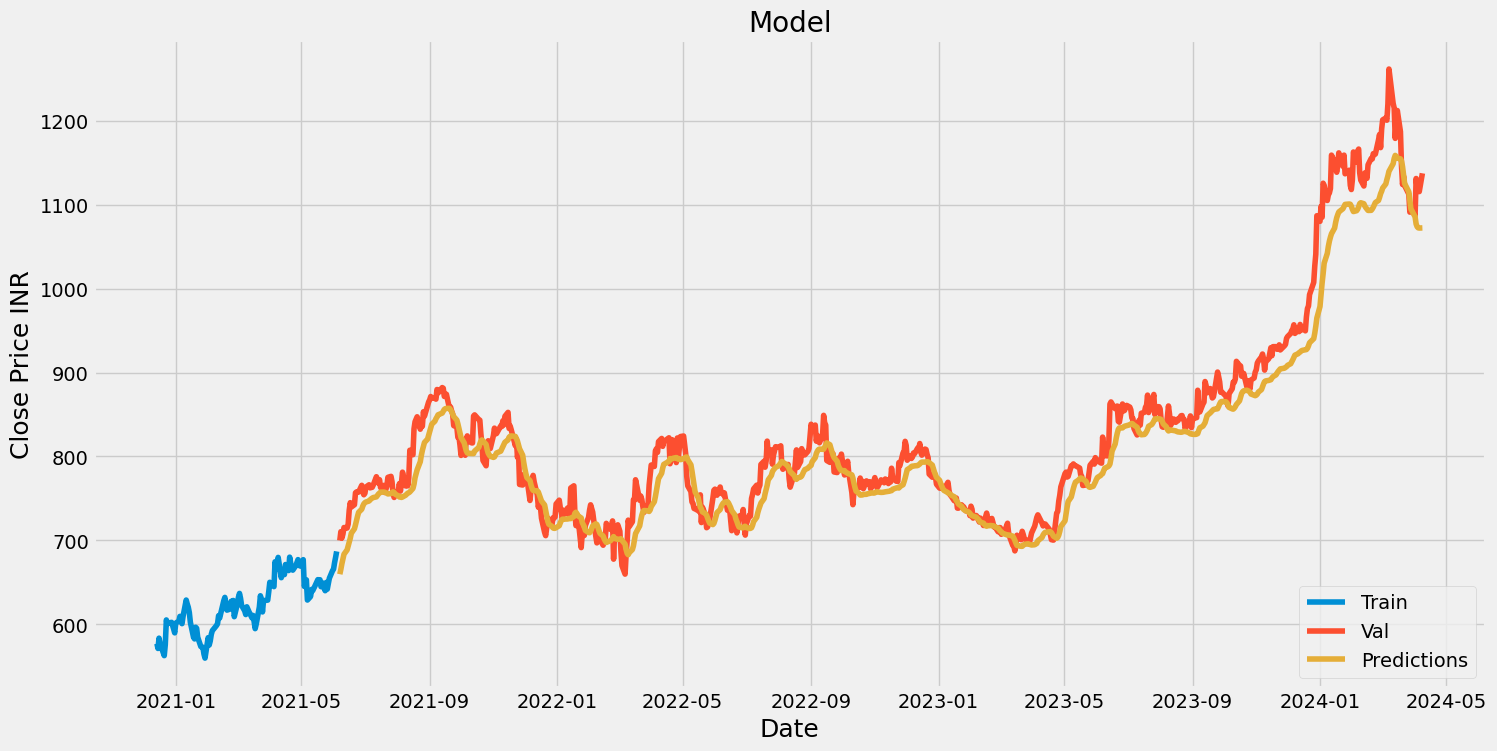

In [44]:
#Plot the data
train = data[2700:training_data_len]
valid = valid.iloc[:len(real_predictions)]
valid['Predictions'] = real_predictions


# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)

plt.plot(train ['Close'] )
plt.plot(valid[['Close', 'Predictions']])

plt.legend (['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

In [46]:

dataset.shape

(3521, 1)

In [47]:
# next day

new_data=dataset[-inp_seq_size:]

scale=scaler.transform(new_data)

model_pass=[]
model_pass.append(scale)
model_pass=np.array(model_pass)
model_pass=np.reshape(model_pass,(model_pass.shape [0], model_pass.shape[1],1))

pred_price =model.predict (model_pass)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[1076.6434]]


In [48]:
days=30

new_dataset=dataset

print("original: ",new_dataset[-days:])

for i in range(0,days):

    scale=scaler.transform(new_dataset)

    new_data=scale[-inp_seq_size:]

    model_pass=[]
    model_pass.append(new_data)
    model_pass=np.array(model_pass)
    model_pass=np.reshape(model_pass,(model_pass.shape [0], model_pass.shape[1],1))

    pred_price =model.predict (model_pass)

    pred_price=scaler.inverse_transform(pred_price)

    new_dataset=np.append(new_dataset,pred_price,axis=0)


print("original: ",new_dataset[-days:])




original:  [[1160.30004883]
 [1177.09997559]
 [1183.59997559]
 [1167.94995117]
 [1190.05004883]
 [1201.        ]
 [1203.25      ]
 [1200.59997559]
 [1220.05004883]
 [1261.55004883]
 [1220.65002441]
 [1215.19995117]
 [1178.94995117]
 [1198.34997559]
 [1212.15002441]
 [1186.94995117]
 [1146.25      ]
 [1124.05004883]
 [1133.94995117]
 [1122.75      ]
 [1112.55004883]
 [1091.05004883]
 [1096.19995117]
 [1086.90002441]
 [1131.15002441]
 [1119.5       ]
 [1117.94995117]
 [1115.55004883]
 [1137.34997559]
 [1125.59997559]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━

In [49]:
new_dataset.shape

(3551, 1)

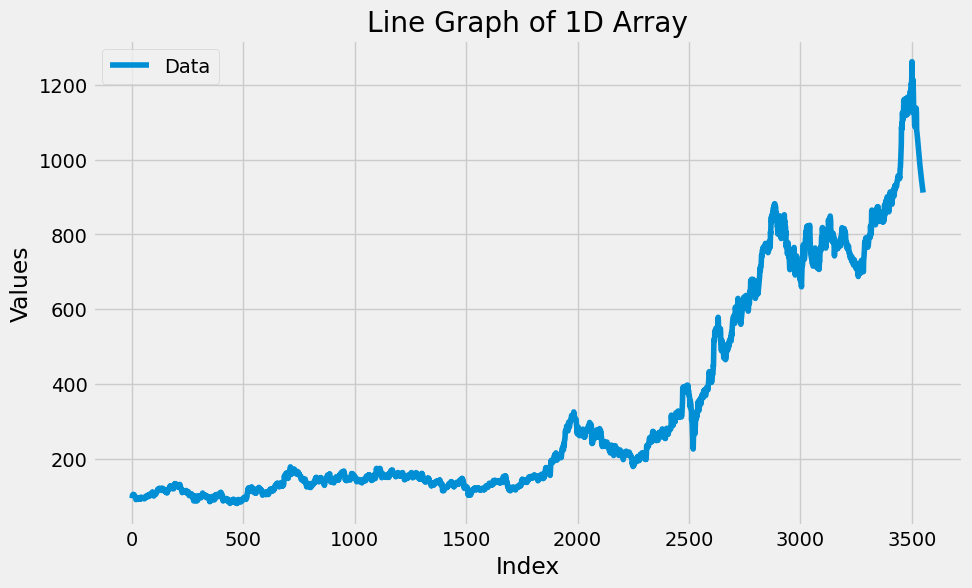

In [50]:
use_dataset=new_dataset

indices = np.arange(1, len(use_dataset) + 1)

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(indices, use_dataset, label='Data')
plt.title('Line Graph of 1D Array')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-53-f98d4cf95eba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = real_predictions


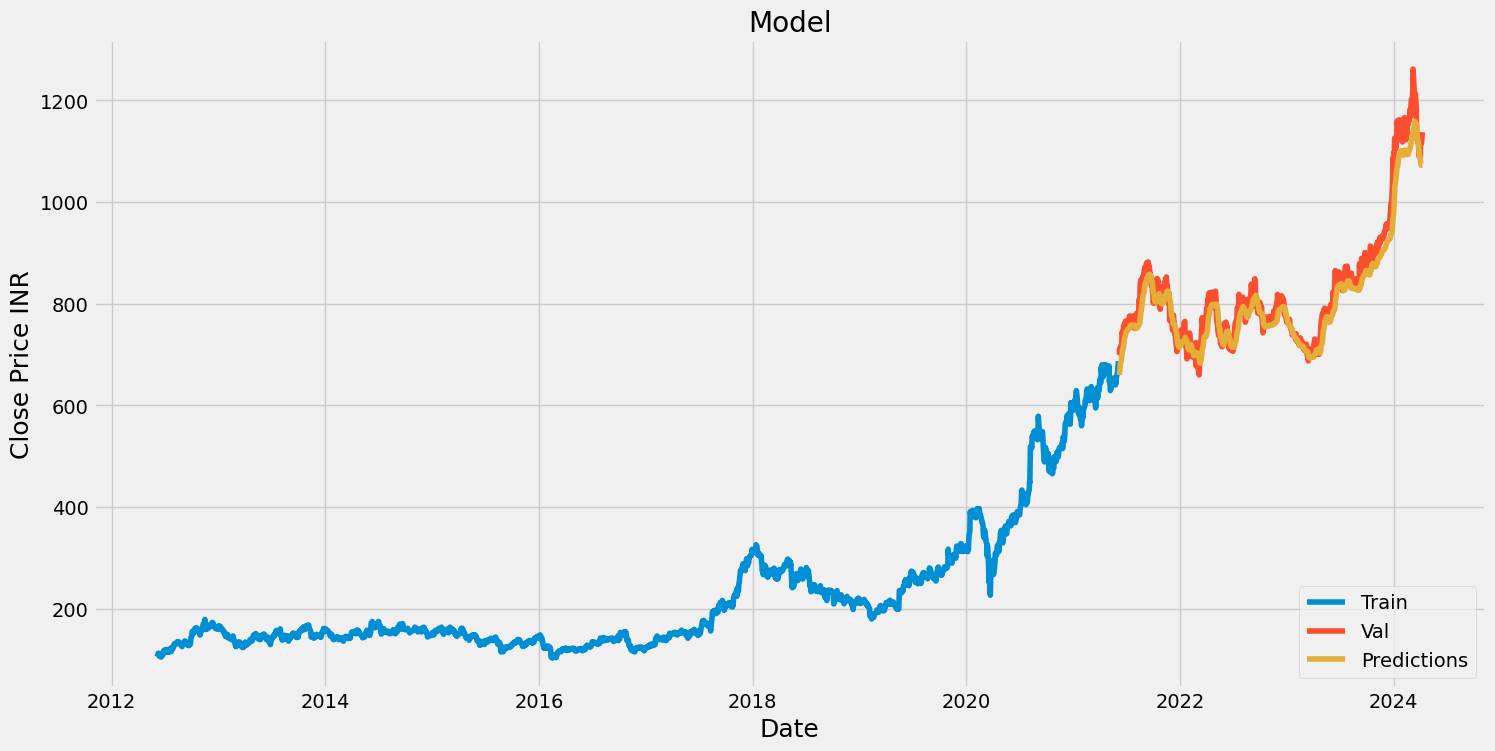

In [53]:
#Plot the data
train = data[600:training_data_len]
valid = valid.iloc[:len(real_predictions)]
valid['Predictions'] = real_predictions


# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)

plt.plot(train ['Close'] )
plt.plot(valid[['Close', 'Predictions']])

plt.legend (['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()


In [54]:
# target day
target_date = '2024-02-12'
row_index = df.index.get_loc(target_date)
print(f" Real vale : {dataset[row_index]} \n")


new_data=dataset[row_index-inp_seq_size:]

print(new_data)

scale=scaler.transform(new_data)

model_pass=[]
model_pass.append(scale)
model_pass=np.array(model_pass)
model_pass=np.reshape(model_pass,(model_pass.shape [0], model_pass.shape[1],1))

pred_price =model.predict (model_pass)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

 Real vale : [1122.19995117] 

[[ 700.40002441]
 [ 732.54998779]
 [ 734.45001221]
 [ 746.70001221]
 [ 754.        ]
 [ 763.84997559]
 [ 779.59997559]
 [ 781.40002441]
 [ 775.5       ]
 [ 776.25      ]
 [ 788.90002441]
 [ 789.        ]
 [ 791.15002441]
 [ 789.45001221]
 [ 789.04998779]
 [ 786.95001221]
 [ 786.25      ]
 [ 778.25      ]
 [ 776.29998779]
 [ 765.45001221]
 [ 766.09997559]
 [ 770.04998779]
 [ 771.15002441]
 [ 780.29998779]
 [ 789.70001221]
 [ 794.25      ]
 [ 790.90002441]
 [ 798.65002441]
 [ 793.65002441]
 [ 796.04998779]
 [ 792.45001221]
 [ 792.09997559]
 [ 823.09997559]
 [ 807.09997559]
 [ 801.        ]
 [ 800.75      ]
 [ 819.90002441]
 [ 862.5       ]
 [ 865.        ]
 [ 862.75      ]
 [ 857.        ]
 [ 858.90002441]
 [ 860.15002441]
 [ 841.90002441]
 [ 840.84997559]
 [ 862.54998779]
 [ 854.20001221]
 [ 854.95001221]
 [ 860.90002441]
 [ 858.84997559]
 [ 855.54998779]
 [ 845.90002441]
 [ 845.04998779]
 [ 833.25      ]
 [ 825.65002441]
 [ 840.29998779]
 [ 843.25      ]


In [55]:
# Assuming 'df' is your DataFrame containing the stock data
target_date = '2024-02-12'

# Convert target date to datetime object
# target_date = pd.to_datetime(target_date)

# Find the row in 'df' corresponding to the target date
row_index = df.index.get_loc(target_date)

# Get the close price for the target date from 'df'
close_price = df.loc[target_date, 'Close']

# Print the close price and the corresponding row index in 'dataset'
print(f"The close price for {target_date} is: {close_price}")
print(f"The corresponding row index in 'dataset' is: {row_index} and {dataset[row_index]}")


The close price for 2024-02-12 is: Ticker
TATACONSUM.NS    1122.199951
Name: 2024-02-12 00:00:00+00:00, dtype: float64
The corresponding row index in 'dataset' is: 3482 and [1122.19995117]
